In [1]:
import numpy
import ga

In [2]:


"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 6
num_parents_mating = 2

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)


[[-3.79075033  1.44774674  3.27007483 -0.67993313  3.22007109 -2.3340475 ]
 [-2.58692699 -2.69103858  1.13826488  1.40989962 -1.54804949  1.18428815]
 [ 3.80635904  2.3479875   2.58288248  1.60907282  2.45593839  3.60283911]
 [ 0.8549559   2.30436104 -1.67385203 -2.10307536 -1.1929729   1.48436132]
 [ 0.36599706 -2.59122128  1.33105494  0.37834445  1.94802039 -1.21706773]
 [ 1.48033021  2.21753053 -3.95510653  2.90152619 -1.43217295 -2.59533374]]


In [3]:


best_outputs = []
num_generations = 10
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    

Generation :  0
Fitness
[-34.46365726  17.53018453 -16.33375218 -11.41655374  -2.51116061
  30.10298888]
Best result :  30.1029888827753
Parents
[[ 1.48033021  2.21753053 -3.95510653  2.90152619 -1.43217295 -2.59533374]
 [-2.58692699 -2.69103858  1.13826488  1.40989962 -1.54804949  1.18428815]]
Crossover
[[ 1.48033021  2.21753053 -3.95510653  1.40989962 -1.54804949  1.18428815]
 [-2.58692699 -2.69103858  1.13826488  2.90152619 -1.43217295 -2.59533374]
 [ 1.48033021  2.21753053 -3.95510653  1.40989962 -1.54804949  1.18428815]
 [-2.58692699 -2.69103858  1.13826488  2.90152619 -1.43217295 -2.59533374]]
Mutation
[[ 1.48033021  2.21753053 -3.86830244  1.40989962 -1.54804949  2.1786244 ]
 [-2.58692699 -2.69103858  1.6127484   2.90152619 -1.43217295 -2.99827049]
 [ 1.48033021  2.21753053 -4.87012881  1.40989962 -1.54804949  0.77071488]
 [-2.58692699 -2.69103858  1.33851724  2.90152619 -1.43217295 -2.03227294]]
Generation :  1
Fitness
[30.10298888 17.53018453  1.78570908 45.03239331  4.8964915

Best solution :  [[[-2.58692699 -2.69103858  4.27234816  2.90152619 -1.43217295
   -4.63691343]]]
Best solution fitness :  [62.04261426]


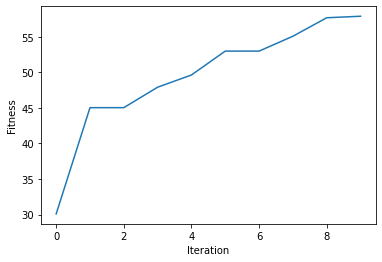

In [4]:

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()
